# Hello Clustering

Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.

Concretely, if we are given N data points, x1, x2, ..., xN , and we would like
to form K clusters. We do the following;

1. **Initialization**: Pick K random data points as K centroid locations c1, c2, ..., cK .
2. **Assign**: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. **Update**: For each centroid, calculate the mean from the data points
assigned to it.
4. **Repeat**: repeat step 2 and 3 until the centroids stop changing (conver-gence).

  Given the following data points in x-y coordinates (2 dimensional)


| x   |  y   |
| --- | ---  |
| 1   |  2   |
| 3   |  3   |
| 2   |  2   |
| 8   |  8   |
| 6   |  6   |
| 7   |  7   |
| -3  |  -3  |
| -2  |  -4  |
| -7  |  -7  |


In [693]:
# Install all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [694]:
# Initialize dataframe
x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
dataframe_points = pd.DataFrame({'x': x, 'y': y})

In [695]:
# Print dataframe
dataframe_points

,x,y
0,1,2
1,3,3
2,2,2
3,8,8
4,6,6
5,7,7
6,-3,-3
7,-2,-4
8,-7,-7


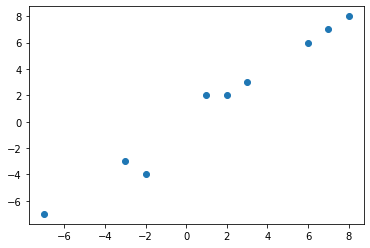

In [696]:
# Plot dataframe
plt.scatter(dataframe_points['x'], dataframe_points['y'])
plt.show()

In [697]:
# Create KMeans class
class KMeans: 
  def __init__(self, points, starting_centriods):
    self.points = points
    self.centriods = starting_centriods
    self.clusters = self.__find_clusters()
    self.iterations = 0

  # Find clusters
  def __find_clusters(self):
    # Copy data
    centriods = self.centriods.copy()
    points = self.points.copy()
    # Initialize clusters
    clusters = [[] for _ in range(len(centriods))]
    # Find clusters
    for point in points.to_numpy():
      distances = []
      for centroid in centriods.to_numpy():
        # Calculate distance from each point to each centroid using Euclidean distance
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)
      # Assign point to cluster
      clusters[np.argmin(distances)].append(point)
    # Update clusters
    self.clusters = clusters
    # Return clusters
    return clusters

  # Update centriods
  def __update_centriods(self):
    # Copy data 
    centriods = self.centriods.copy()
    clusters = self.clusters.copy()
    # Update centriods
    for i in range(len(clusters)):
      clustered_points = clusters[i]
      centriods.iloc[i] = np.mean(clustered_points, axis=0)
    # Return updated centriods
    return centriods

  def run(self):
    self.centriods = self.__update_centriods()
    self.clusters = self.__find_clusters()
    self.iterations += 1

  def plot(self):
    colors = ['violet', 'limegreen', 'skyblue']
    darken_colors = ['indigo', 'green', 'blue']
    for i in range(len(self.clusters)):
      clustered_points = np.array(self.clusters[i])
      plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=i, c=colors[i])
      plt.scatter(self.centriods['x'][i], self.centriods['y'][i], marker='*', c=darken_colors[i])
    plt.legend()
    plt.show()

# T1

If the starting points are (3,3), (2,2), and (-3,-3). Describe each
assign and update step. What are the points assigned? What are the updated
centroids? You may do this calculation by hand or write a program to do it.

   x  y
0  3  3
1  2  2
2 -3 -3


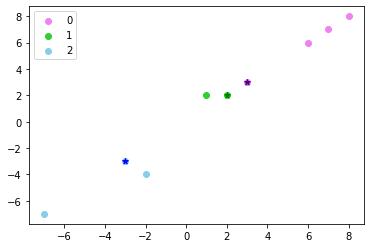

     x         y
0  6.0  6.000000
1  1.5  2.000000
2 -4.0 -4.666667


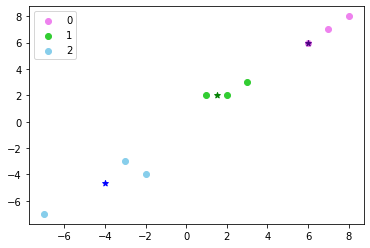

In [698]:
# Initialize centroids
starting_centriods = pd.DataFrame({
  'x': [3, 2, -3], 
  'y': [3, 2, -3]
})
kMeans = KMeans(dataframe_points, starting_centriods)
print(kMeans.centriods)
kMeans.plot()
kMeans.run()
print(kMeans.centriods)
kMeans.plot()

### Answer 

updated centroids คือ 

1. (6, 6)
2. (1.5, 2)
3. (-4, -4.67) ตามลำดับ

# T2

If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

   x  y
0 -3 -3
1  2  2
2 -7 -7


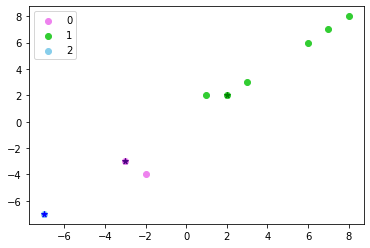

     x         y
0 -2.5 -3.500000
1  4.5  4.666667
2 -7.0 -7.000000


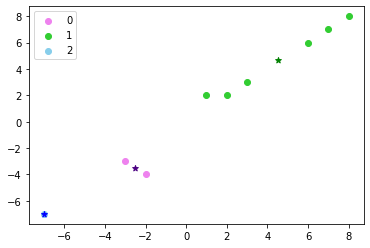

In [699]:
# Initialize centroids
starting_centriods = pd.DataFrame({
  'x': [-3, 2, -7], 
  'y': [-3, 2, -7]
})
kMeans = KMeans(dataframe_points, starting_centriods)
print(kMeans.centriods)
kMeans.plot()
kMeans.run()
print(kMeans.centriods)
kMeans.plot()

### Answer 

updated centroids คือ 

1. (-2.5, -3.5)
2. (4.5, 4.67)
3. (-7, -7) ตามลำดับ

# T3

Between the two starting set of points in the previous two questions,
which one do you think is better? How would you measure the ‘goodness’ quality
of a set of starting points?

In general, it is important to try different sets of starting points when doing
k-means.

## Answer

แบบแรกจะดีกว่า เพราะสังเกตว่า แบบที่สองกลุ่มที่อยู่บนขวา กับกลุ่มที่อยู่แถวกลาง ๆ ถูกจัดให้อยู่ใน cluster เดียวกัน ซึ่งจริง ๆ แล้ว 2 กลุ้่มนี้แยกออกจากกันชัดเจน เมื่อมองด้วยตา 

โดยทั่วไปแล้ว การเลือกจุดเริ่มต้นของ centriods ค่อนข้างสำคัญ เพราะถ้าเราเลือก centroid ได้ไม่ดี เช่น centriod ไปกระจุกตัวอยู่แถว ๆ เดียวกัน จะทำให้ Algorithm ในการแบ่งกลุ่มทำงานได้ไม่ดีพอที่เราจะเอามาใช้ตีความต่อ

# OT1

What would be the best K for this question? Describe your reason-
ing.

## Answer

สำหรับโจทย์ข้อนี้น่าจะเป็น K = 4 เพราะเมื่อมองด้วยตาเปล่าเราจะเห็นว่ามี 4 กลุ่มแบ่งออกจากกันชัดเจน ไล่จากล่างซ้าย ขึ้นไปยัง บนขวา

# My heart will go on

In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding the Titanic on its final voyage. We will work on predicting whether a given passenger will survive the trip.

Let’s launch Jupyter and start coding!
We start by importing the data using Pandas

```
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
```

```
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
```

Both train and test are dataframes. Use the function train.head() and
train.tail() to explore the data. What do you see?
Use the function describe() to get a better understanding of the data.
You can read the meaning of the data fields at https://www.kaggle.com/c/
titanic/data 

Looking at the data, you will notice a lot of missing values. For example, some age is NaN. This is normal for real world data to have some missing values. There are several ways to handle missing values. The simplest is to throw away any rows that have missing values. However, this usually reduce the amount of training data you have. Another method is to guess what the missing value should be. The simplest guess is to use the Median or Mode of the data. For this exercise we will proceed with this.

In [700]:
# Install traning set and test set

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

# Define dataset
dataset = [train, test] 

In [701]:
dataset[0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [702]:
dataset[1].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [703]:
for data in dataset: 
  print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

# T4 

What is the median age of the training set? You can easily modify
the age in the dataframe by

In [704]:
for data in dataset:
  data["Age"] = data["Age"].fillna(data["Age"].median())

In [705]:
# Normailize age
for data in dataset:
  data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())

# T5

Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is the mode of Embarked? Fill the missing values with the mode. You can set the value of Embarked easily with the following command

Do the same for Sex.

In [706]:
# S = 0
# C = 1
# Q = 2
for data in dataset:
  data["Age"] = data["Age"].fillna(data["Age"].median())
  data.loc[data["Embarked"] == "S", "Embarked"] = 0
  data.loc[data["Embarked"] == "C", "Embarked"] = 1
  data.loc[data["Embarked"] == "Q", "Embarked"] = 2
  data["Embarked"] = data["Embarked"].fillna(data["Embarked"].median())


In [707]:
# male = 0
# female = 1
for data in dataset:
  data.loc[data["Sex"] == "male", "Sex"] = 0
  data.loc[data["Sex"] == "female", "Sex"] = 1

# T6

Write a logistic regression classifier using gradient descent as learned in class. Use PClass, Sex, Age, and Embarked as input features. You can extract the features from Pandas to Numpy by

In [708]:
# Define cleaned data

train_df = copy.deepcopy(dataset)[0]
test_df  = copy.deepcopy(dataset)[1]

train_data = np.array(train_df[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
test_data = np.array(test_df[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

train_y = np.array(train_df[["Survived"]].values, dtype = float)
train_y = train_y.reshape(train_y.size)

In [709]:
# Define sigmoid function
def sigmoid(x):
  return np.array(1/(1+np.exp(-x)))
# Define cost function
def cost(theta, data, y):
  m = data.shape[0]
  predictions = np.array(sigmoid(np.dot(data, theta)))
  cost = -(1/m)*(np.dot(y, np.log(predictions.T+1e-5)) + np.dot((1-y), np.log(1-predictions.T+1e-5)))
  return cost
# Define gradient function
def gradient(theta, data, y):
  m = data.shape[0]
  predictions = sigmoid(np.dot(data, theta))
  error = predictions - y
  gradient = (1/m)*np.dot(data.T, error)
  return gradient
# Define gradient descent function
def gradient_descent(theta, data, y, alpha, iteration=10000):
  cost_history = []
  for _ in range(iteration):
    cost_history.append(cost(theta, data, y))
    theta = theta - alpha*gradient(theta, data, y)
  return theta, cost_history
def predict(data, theta, raw):
  predictions = np.array(sigmoid(np.dot(data, theta)))
  predictions = np.where(predictions >  0.5, 1, predictions)
  predictions = np.where(predictions <= 0.5, 0, predictions)
  predictions = np.array(predictions, dtype = int)
  print("Survived", np.count_nonzero(predictions))
  result = pd.DataFrame({
    "PassengerId": raw["PassengerId"],
    "Survived": predictions
  })
  return result
def compare_prediction(actual, prediction):
  df = pd.DataFrame({
    "Actual": actual,
    "Prediction": prediction,
    "Compare": actual == prediction
  })
  return df["Compare"].sum()/len(actual)

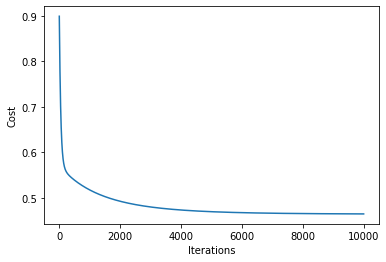

[-0.71967932  2.50169202 -0.09922443  0.34264704]


In [710]:
# Initialize features number
features = train_data.shape[1]
# Random pick theta
theta = np.random.random(features)
# Initialize learning rate
alpha = 0.007
# Run gradient descent
theta, cost_history = gradient_descent(theta, train_data, train_y, alpha)
# Plot cost history
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

print(theta)

In [711]:
print("Train Survived", np.count_nonzero(train["Survived"]))
result = predict(train_data, theta, train_df)
print("Accuracy", compare_prediction(train_y, result["Survived"]))
result = predict(test_data, theta, test_df)
result.to_csv("./assets/result.csv", index = False)

Train Survived 342
Survived 314
Accuracy 0.7867564534231201
Survived 152


# T7

### My predictions score

<img src="./predictions_screenshot.png">

# T8

Try adding some higher order features to your training (x21, x1x2,...).
Does this model has better accuracy on the training set? How does it
perform on the test set?

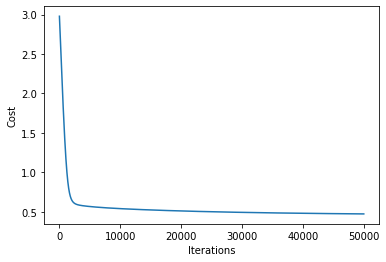

[-5.54555750e-01  7.22923702e-02  1.81313447e+00  4.10982154e-01
 -2.65926154e-01 -4.22421403e-04  5.43272178e-01]
0    549
1    342
Name: Survived, dtype: int64
Survived 249
Accuracy 0.8035914702581369
Survived 121


In [719]:
# Copy dataset
dataset_1 = copy.deepcopy(dataset)
data_1 = []

# Add new features
for i in range(len(dataset_1)):
  d = dataset_1[i]
  d.replace('', np.nan, inplace=True)
  d["Age*Class"] = d["Age"]*d["Pclass"]
  d["SibSp"] = d["SibSp"].fillna(0)
  d["Parch"] = d["Parch"].fillna(0)
  d["Family_Size"] = d["SibSp"]+d["Parch"]+1
  d["Fare"] = d["Fare"].fillna(d["Fare"].median())
  d["Fare_Per_Person"] = d["Fare"]/d["Family_Size"]
  d["Fare_Per_Person"] = (d["Fare_Per_Person"] - d["Fare_Per_Person"].min()) / (d["Fare_Per_Person"].max() - d["Fare_Per_Person"].min())
  data_1.append(np.array(d[["Pclass","Age","Sex","Embarked","Age*Class","Family_Size","Fare_Per_Person"]].values, dtype = float))

# Extract dataset
train_data_1 = data_1[0]
test_data_1  = data_1[1]

# Initialize features number
features_1 = train_data_1.shape[1]
# Random pick theta
theta_1 = np.random.random(features_1)

train_y_1 = np.array(train[["Survived"]].values, dtype = float)
train_y_1 = train_y_1.reshape(train_y_1.size)

# Initialize learning rate
alpha = 0.0005
iteration = 50000

# Run gradient descent
theta_1, cost_history = gradient_descent(theta_1, train_data_1, train_y_1, alpha, iteration)
# Plot cost history
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

# Print theta
print(theta_1)

# Predict test set
print(dataset_1[0]["Survived"].value_counts())
result = predict(train_data_1, theta_1, dataset_1[0])
print("Accuracy", compare_prediction(train_y_1, result["Survived"]))
result = predict(test_data_1, theta_1, dataset_1[1])
result.to_csv("./assets/result_1.csv", index = False)

### Answer 

การทำนายที่ได้ fit กับ train data มากขึ้น แต่เมื่อลองส่งไปแล้วพบว่าคะแนนความถูกต้องลดลง (Overfitting) แต่เมื่อลองเอา Fare per person ออกพบว่าการทำนายได้คะแนนเพิ่มขึ้นดังรูป

<img src="predictions_screenshot_1.png" />

# T9

What happens if you reduce the amount of features to just Sex and
Age?

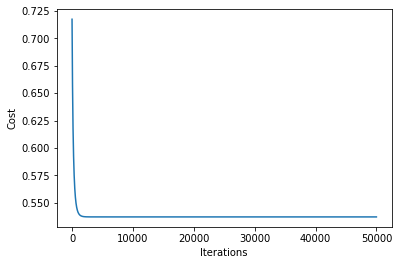

[-3.23752429  2.23751753]
0    549
1    342
Name: Survived, dtype: int64
Survived 305
Accuracy 0.7789001122334456
Survived 138


In [713]:
# Copy dataset
dataset_2 = copy.deepcopy(dataset)
data_2 = []

# Add new features
for i in range(len(dataset_2)):
  d = dataset_2[i]
  data_2.append(np.array(d[["Age","Sex"]].values, dtype = float))

# Extract dataset
train_data_2 = data_2[0]
test_data_2  = data_2[1]

# Initialize features number
features_2 = train_data_2.shape[1]
# Random pick theta
theta_2 = np.random.random(features_2)

train_y_2 = np.array(train[["Survived"]].values, dtype = float)
train_y_2 = train_y_1.reshape(train_y_2.size)

# Initialize learning rate
alpha = 0.1
iteration = 50000

# Run gradient descent
theta_2, cost_history = gradient_descent(theta_2, train_data_2, train_y_2, alpha, iteration)
# Plot cost history
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

# Print theta
print(theta_2)

# Predict test set
print(dataset_2[0]["Survived"].value_counts())
result = predict(train_data_2, theta_2, dataset_2[0])
print("Accuracy", compare_prediction(train_y_2, result["Survived"]))
result = predict(test_data_2, theta_2, dataset_2[1])

# Answer 

Model ทำนายผู้โดยสารได้แย่ลง เพราะขาดข้อมูลอื่นในการประกอบการตัดสินใจ

# Fun with matrix algebra

Prove the following statements. All of them can be solved by first expanding
out the matrix notation as a combination of their elements, and then use the
definitions of trace and matrix derivatives to help finish the proof. For example,
the (i, j) element of $Y = AB$ is $Y_{i,j} = \Sigma_m A_{i,m} B_{m,j}$.

# OT4

1. $\nabla_A trAB = B^T$
    
    Let $Y = AB$

    Then, $Y_{i,j} = \Sigma_m A_{i,m} B_{m,j}$

    So, $tr(Y) = tr(AB) = \Sigma_m A_{i,m} B_{m,i}$

    Since, 

$$
\begin{aligned}
    \nabla_A f(A) = 
    \begin{bmatrix}
    \frac{\delta f}{\delta A_{1,1}} & ... & \frac{\delta f}{\delta A_{1,n}}\\
    ... & ... & ... \\
    \frac{\delta f}{\delta A_{n,1}} & ... & \frac{\delta f}{\delta A_{n,n}}
    \end{bmatrix}
\end{aligned}
$$

    So, 
    
$$
\begin{aligned}
    \nabla_A (tr(AB)) = \nabla_A (\Sigma_m A_{i,m} B_{m,i}) = 
    \begin{bmatrix}
    \frac{\delta \Sigma_m A_{i,m} B_{m,i}}{\delta A_{1,1}} & ... & \frac{\delta \Sigma_m A_{i,m} B_{m,i}}{\delta A_{1,n}}\\
    ... & ... & ... \\
    \frac{\delta \Sigma_m A_{i,m} B_{m,i}}{\delta A_{n,1}} & ... & \frac{\delta \Sigma_m A_{i,m} B_{m,i}}{\delta A_{n,n}}
    \end{bmatrix}
\end{aligned}
$$

    Fianlly, 
    
$$
\begin{aligned}
    \nabla_A (\Sigma_m A_{i,m} B_{m,i}) = 
    \begin{bmatrix}
    B_{1,1} & ... & B_{n,1}\\
    ... & ... & ... \\
    B_{1,n} & ... & B_{n,n}
    \end{bmatrix}
    = B^T
\end{aligned}
$$

    Q.E.D

# OT5

2. $\nabla_{A^T} f(A) = (\nabla_Af(A))^T$

    Since, 

$$
\begin{aligned}
    \nabla_A f(A) = 
    \begin{bmatrix}
    \frac{\delta f}{\delta A_{1,1}} & ... & \frac{\delta f}{\delta A_{1,n}}\\
    ... & ... & ... \\
    \frac{\delta f}{\delta A_{n,1}} & ... & \frac{\delta f}{\delta A_{n,n}}
    \end{bmatrix}
\end{aligned}
$$

    Then, 
    
$$
\begin{aligned}
    \nabla_{A^T} f(A) = 
    \begin{bmatrix}
    \frac{\delta f}{\delta A_{1,1}} & ... & \frac{\delta f}{\delta A_{n,1}}\\
    ... & ... & ... \\
    \frac{\delta f}{\delta A_{1,n}} & ... & \frac{\delta f}{\delta A_{n,n}}
    \end{bmatrix}
=   \begin{bmatrix}
    \frac{\delta f}{\delta A_{1,1}} & ... & \frac{\delta f}{\delta A_{1,n}}\\
    ... & ... & ... \\
    \frac{\delta f}{\delta A_{n,1}} & ... & \frac{\delta f}{\delta A_{n,n}}
    \end{bmatrix}^T  
=   (\nabla_Af(A))^T      
\end{aligned}
$$
